## This dataset has 10127 entries and 23 attributes. In this case, I exploded the dataset by checking missing values, visuliazing differences and figuring out correlations

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data=pd.read_csv('C:\\Users\\hanfe\\Desktop\\数据练习\\BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [12]:
data.shape

(10127, 23)

In [20]:
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [22]:
data.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [33]:
label=data.Gender.value_counts().tolist()

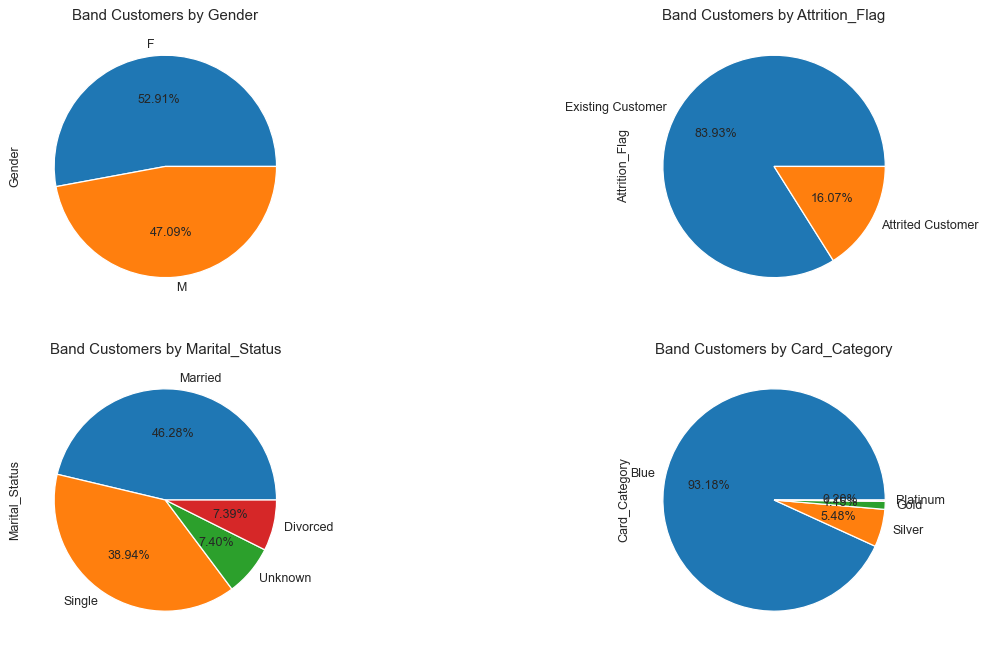

In [63]:
plt.figure(figsize=(16,9),dpi=90)

pie_columns=['Gender','Attrition_Flag','Marital_Status','Card_Category']
for i in range(0,len(pie_columns)):
    plt.subplot(2,2,i+1)
    data[pie_columns[i]].value_counts().plot(kind='pie',autopct='%.2f%%')
    plt.title(f'Band Customers by {pie_columns[i]}')
    

In [68]:
bar_columns=['Dependent_count','Education_Level','Total_Relationship_Count','Income_Category','Contacts_Count_12_mon','Months_Inactive_12_mon']
for i in range(0,len(bar_columns)):
    print(data[bar_columns[i]].unique())

[3 5 4 2 0 1]
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
[5 6 4 3 2 1]
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
[3 2 0 1 4 5 6]
[1 4 2 3 6 0 5]


In [75]:
data['Education_Level'].value_counts().tolist()

[3128, 2013, 1519, 1487, 1013, 516, 451]

In [85]:
data[bar_columns[i]].value_counts().index
data[bar_columns[i]].value_counts().values

array([2732, 2655, 1838, 1574,  904,  424], dtype=int64)

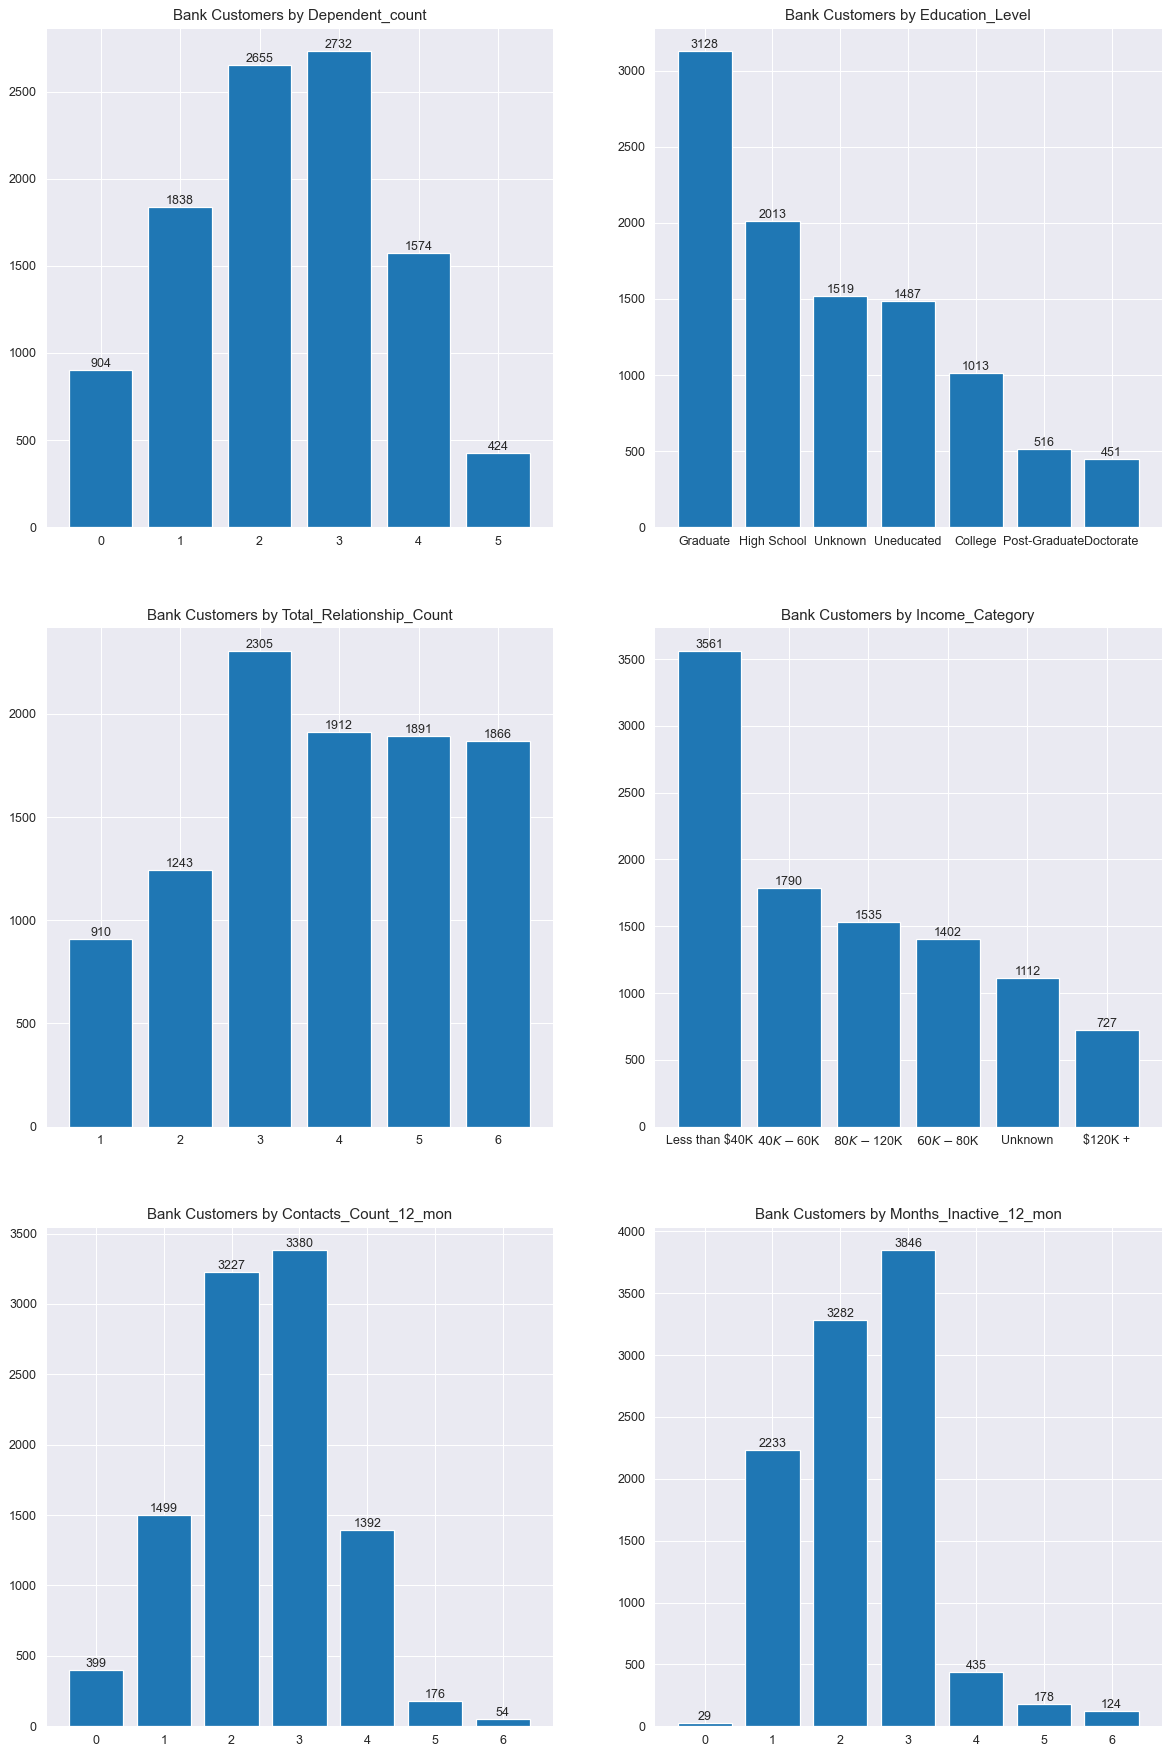

In [89]:
plt.figure(figsize=(16,25),dpi=90)
bar_columns=['Dependent_count','Education_Level','Total_Relationship_Count','Income_Category','Contacts_Count_12_mon','Months_Inactive_12_mon']
for i in range(0,len(bar_columns)):
    plt.subplot(3,2,i+1)
    bar1=plt.bar(data[bar_columns[i]].value_counts().index,data[bar_columns[i]].value_counts().values)
    plt.bar_label(bar1,label_type='edge')
    plt.title(f'Bank Customers by {bar_columns[i]}')

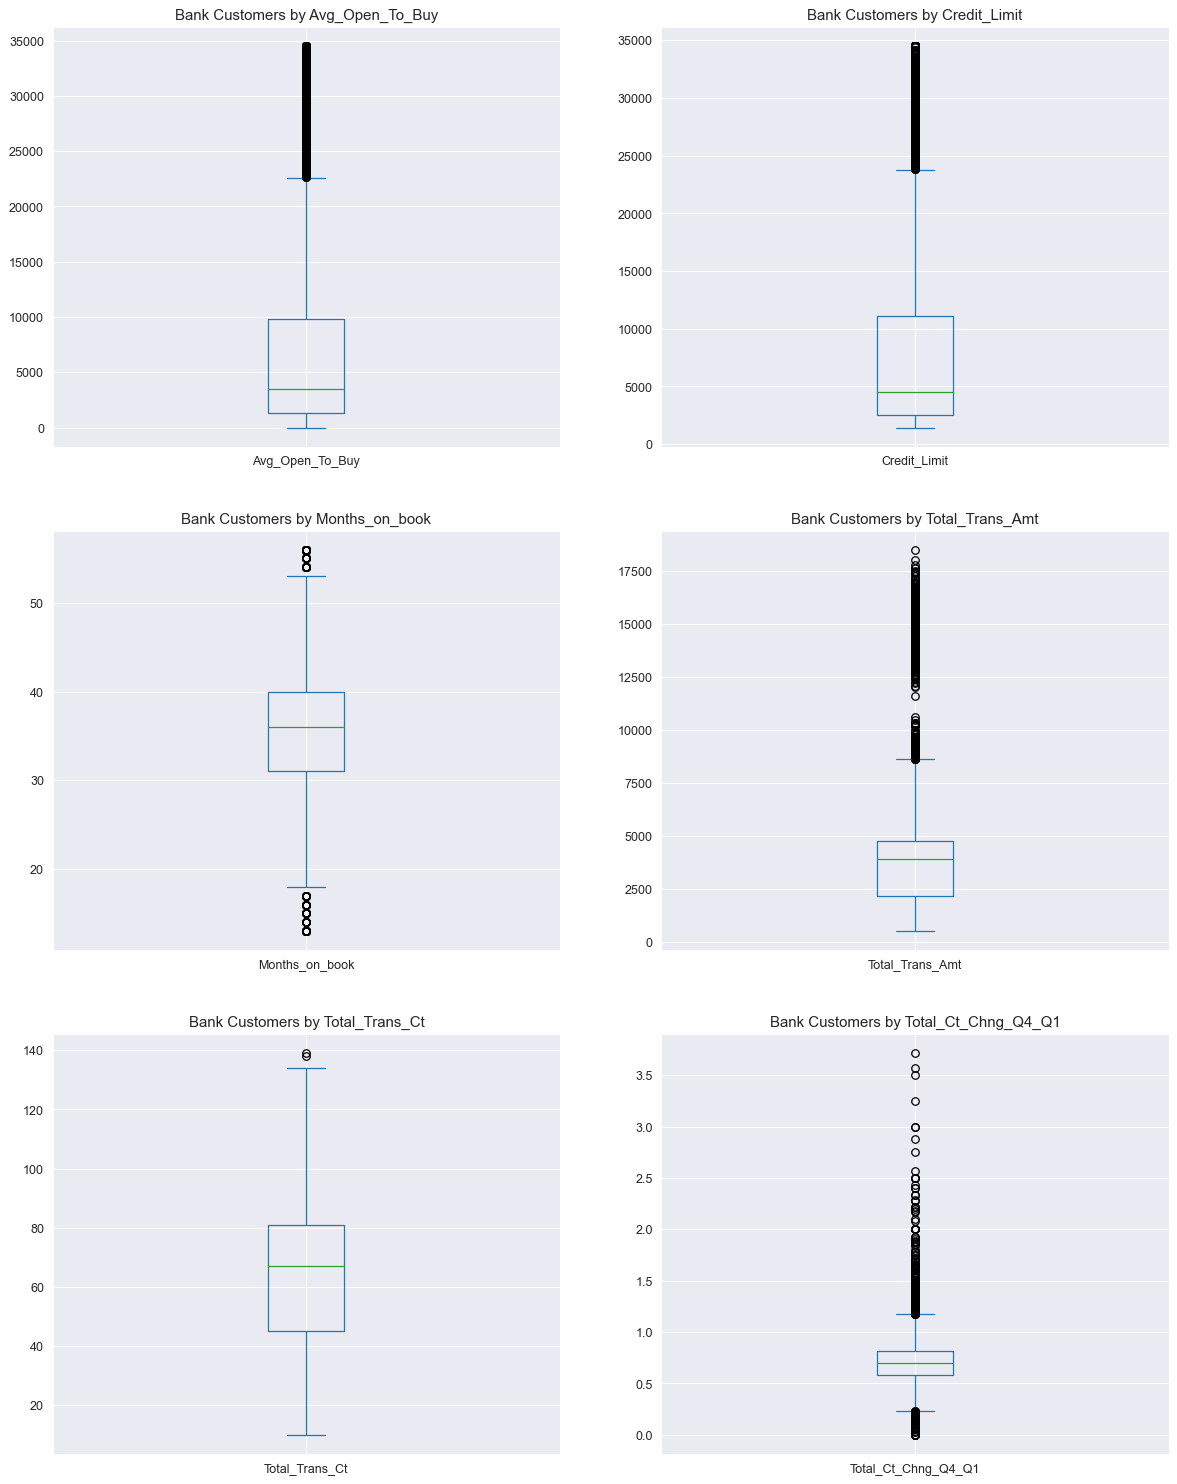

In [100]:
plt.figure(figsize=(16,21),dpi=90)
box_columns=['Avg_Open_To_Buy','Credit_Limit','Months_on_book','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
for i in range(0,len(bar_columns)):
    plt.subplot(3,2,i+1)
    data[box_columns[i]].plot(kind='box')
    plt.title(f'Bank Customers by {box_columns[i]}')

In [90]:
data.Credit_Limit.describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

<AxesSubplot:>

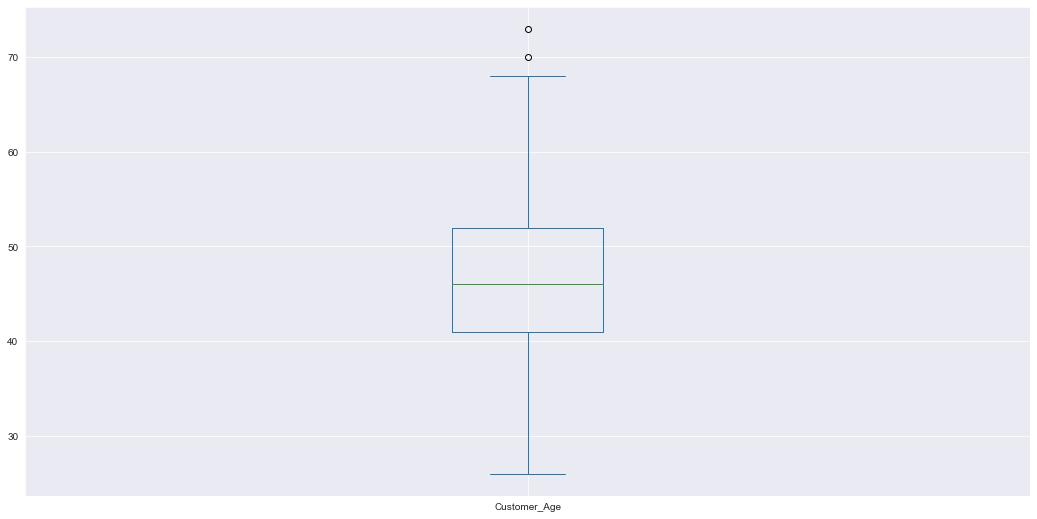

In [105]:
data.Customer_Age.plot(kind='box')

In [96]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [103]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Customer_Age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Customer_Age'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

### We can see that the distribution of customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption.

In [107]:
data.query('Card_Category=="Blue"').Gender.value_counts().values

array([5101, 4335], dtype=int64)

([<matplotlib.patches.Wedge at 0x20579bbdb20>,
 [Text(-0.13988643895896757, 1.0910691014758778, 'Female Blue Card Holders'),
  Text(0.13988633680570495, -1.0910691145729867, 'Male Blue Card Holders')],
 [Text(-0.07630169397761867, 0.5951286008050242, '54.06%'),
  Text(0.07630163825765723, -0.5951286079489018, '45.94%')])

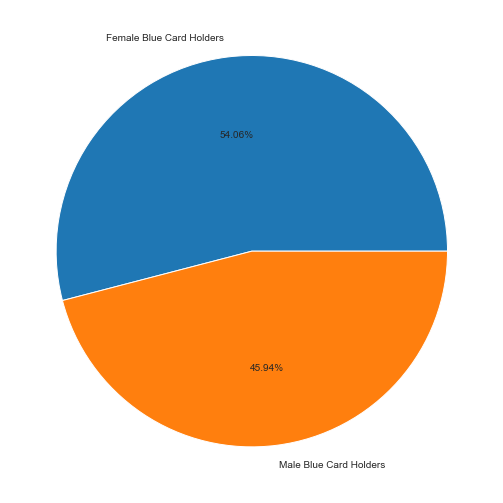

In [110]:
plt.pie(data.query('Card_Category=="Blue"').Gender.value_counts().values.tolist(),labels=['Female Blue Card Holders','Male Blue Card Holders'],autopct='%.2f%%')

In [112]:
ex.pie(data,names='Education_Level',title='Propotion Of Education Levels',hole=0.33)

In [116]:
ex.pie(data,data.query('Card_Category=="Blue"').Gender,title='Propotion Of Blue Card Holder by Gender',hole=0.33)

In [118]:
ex.pie(data,names='Income_Category',title='Propotion Of Different Income Levels',hole=0.33)

In [119]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Credit_Limit'],name='Credit_Limit Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Credit_Limit'],name='Credit_Limit Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the Credit Limit")
fig.show()

In [120]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Total_Trans_Amt'],name='Total_Trans_Amt Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Total_Trans_Amt'],name='Total_Trans_Amt Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the Total Transaction Amount (Last 12 months)")
fig.show()

### We see that the distribution of the total transactions (Last 12 months) displays a multimodal distribution, meaning we have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.

In [121]:
ex.pie(data,names='Attrition_Flag',title='Proportion of churn vs not churn customers',hole=0.33)

### As we can see, only 16% of the data samples represent churn customers; in the following steps, I will use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed out with such a size difference.

## Data Preprocessing

In [129]:
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [130]:
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
data.Gender = data.Gender.replace({'F':1,'M':0})
data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

KeyError: 'Education_Level'

In [133]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =data.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=0.7,ygap=0.7,colorscale=colorscale),
    row=1, col=1
)


s_val =data.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=0.7,ygap=0.7,colorscale=colorscale),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=1200, width=900, title_text="Numeric Correaltions")
fig.show()